In [1]:
import numpy as np
import cv2
# visualization of the images as plots
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# to read images 
import glob
import random

In [2]:
##1 Read data
print ("Reading images...")
## locally stored labeled dataset
vehicle_images = glob.glob('C:/Users/Ishu/Desktop/car detector/dataset/vehicles/*.png')
non_vehicle_images = glob.glob('C:/Users/Ishu/Desktop/car detector/dataset/non-vehicles/*.png')
##2 arrays one for vehicle images and 1 for non vehicle 
vehicle_images_arr = []
non_vehicle_images_arr = []

## using the paths to read the images into variables using cv2
for img_path in vehicle_images:
    img = cv2.imread(img_path)
    vehicle_images_arr.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
 ## same for non vehicle images   
for img_path in non_vehicle_images:
    img = cv2.imread(img_path)
    non_vehicle_images_arr.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
print(".reading done successfully")

print("Vehicle Images count: " + str(len(vehicle_images_arr)))
print("Non-Vehicle Images count: " + str(len(non_vehicle_images_arr)))


Reading images...
.reading done successfully
Vehicle Images count: 8792
Non-Vehicle Images count: 8968


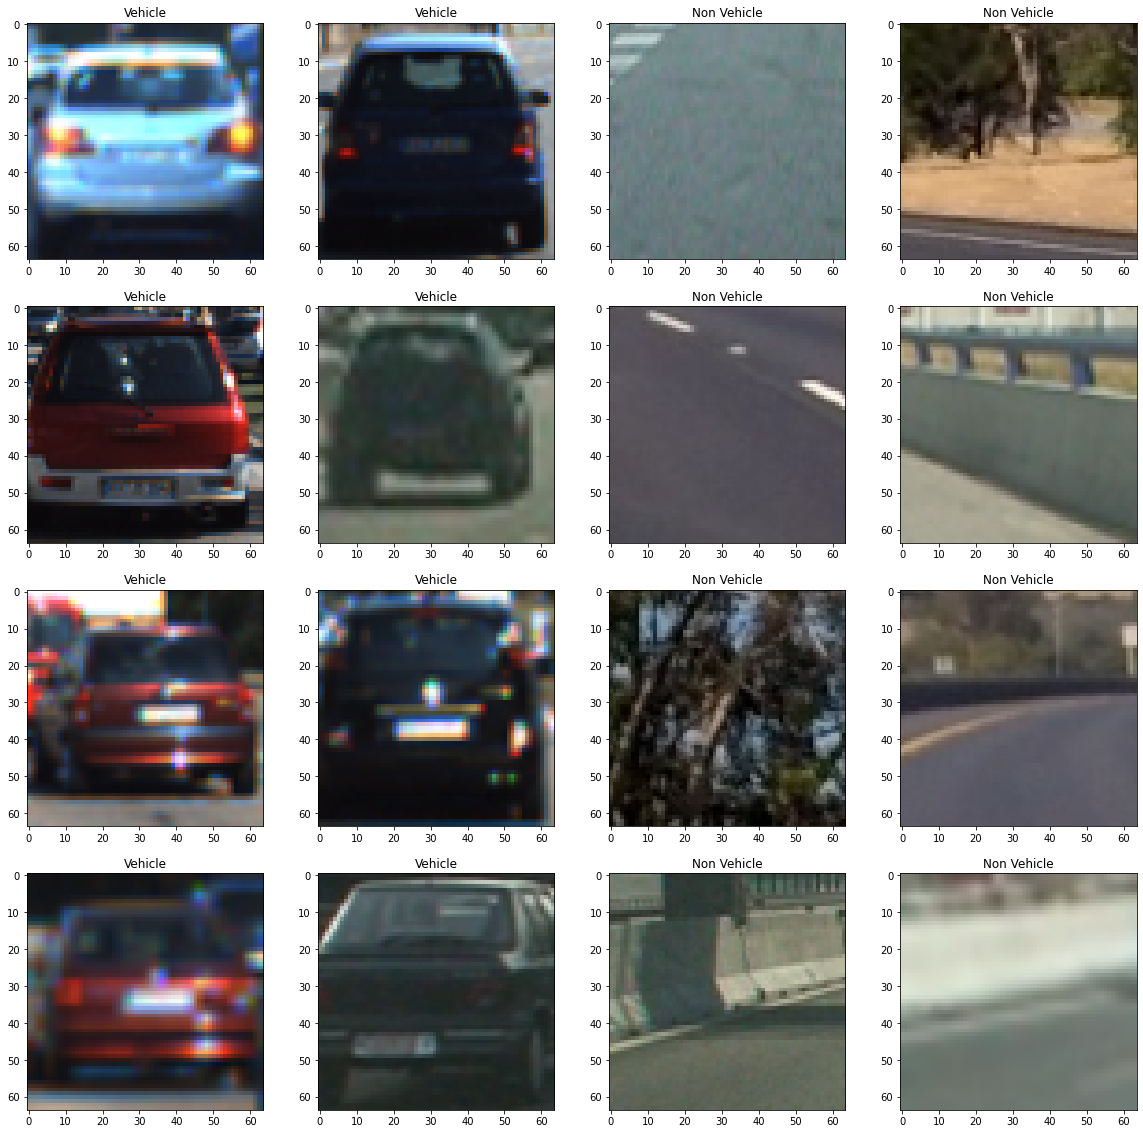

In [3]:
#2 visualizinng some of images from the dataset
f, axes = plt.subplots(4, 4, figsize=(20, 20))
for i in range(4):
    ## choosing random vehicle and non vehicle images
    vehicle1 = random.randint(0, len(vehicle_images_arr) - 1)
    vehicle2 = random.randint(0, len(vehicle_images_arr) - 1)
    non_vehicle1 = random.randint(0, len(non_vehicle_images_arr) - 1)
    non_vehicle2 = random.randint(0, len(non_vehicle_images_arr) - 1)
    axes[i,0].set_title("Vehicle")
    axes[i,0].imshow(vehicle_images_arr[vehicle1])
    axes[i,1].set_title("Vehicle")
    axes[i,1].imshow(vehicle_images_arr[vehicle2])
    axes[i,2].set_title("Non Vehicle")
    axes[i,2].imshow(non_vehicle_images_arr[non_vehicle1])
    axes[i,3].set_title("Non Vehicle")
    axes[i,3].imshow(non_vehicle_images_arr[non_vehicle2])

In [4]:
#3 Color Spaces
# Define a function to compute color histogram features  
# here we are using the histograms of RGB colors seaparately to extract the features
def color_hist(img, nbins=64, bins_range=(0, 256)):
    # Compute the histogram of the RGB channels separately
    channel_0 = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel_1 = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel_2 = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # bin centers
    bin_edges = channel_0[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # making single feature out of the 3 rgb feature vectors
    hist_features = np.concatenate((channel_0[0], channel_1[0], channel_2[0]))
    # Return  histograms, bin_centers and feature vector created from the 
    return channel_0, channel_1, channel_2, bin_centers, hist_features

1. HLS Colorspace
2. RGB Colorspace
3. YUV Colorspace


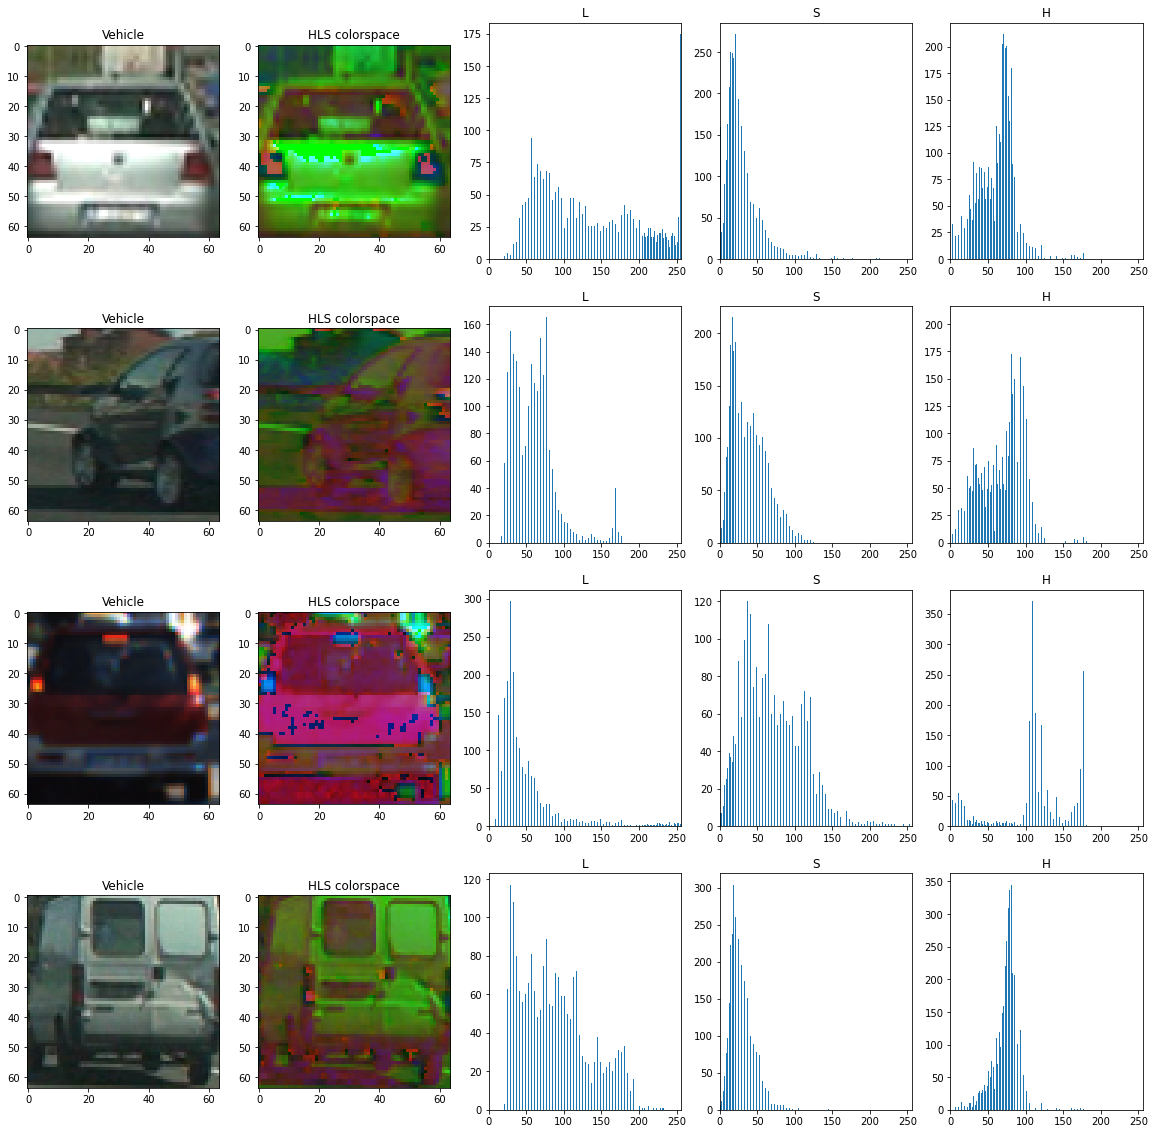

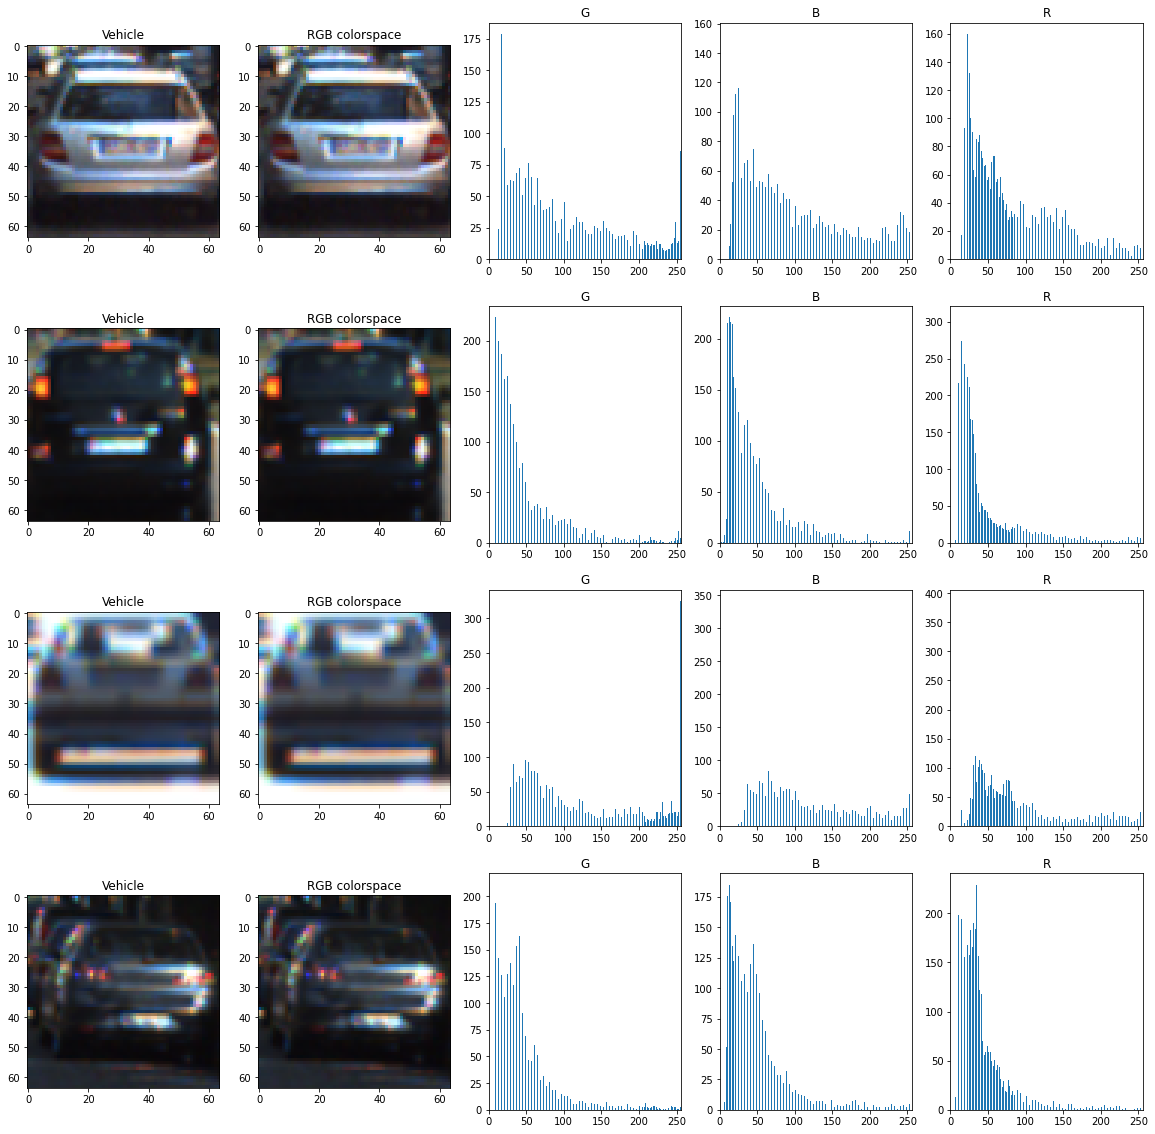

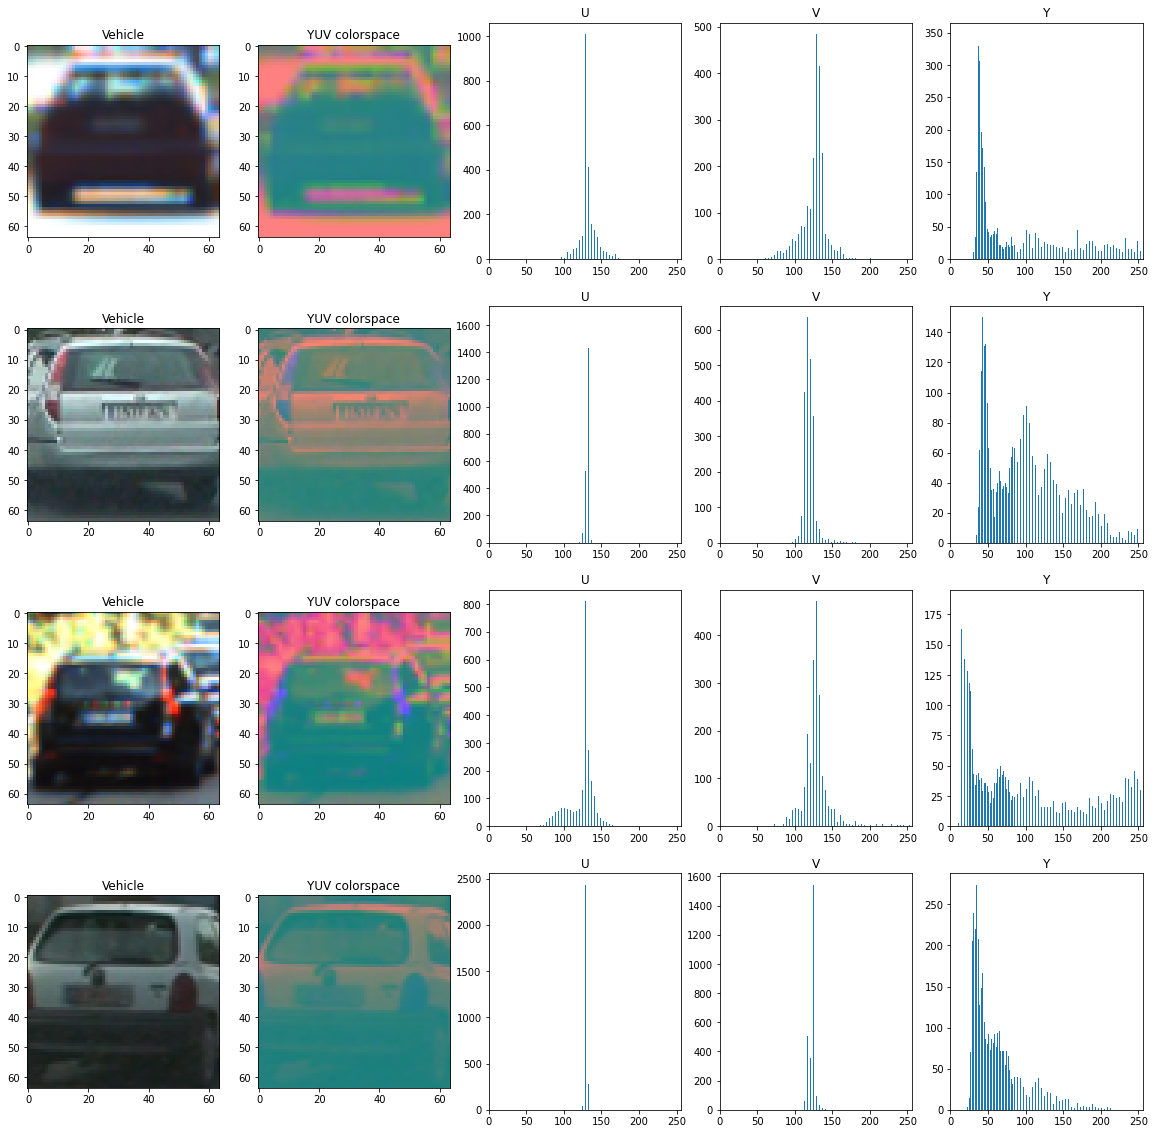

In [5]:
##4 Visualize the vehicle color features
## using the hls and rgb and yub
## features are collected using the 3 colorspaces 
f, axes = plt.subplots(4, 5, figsize=(20, 20))
print ("1. HLS Colorspace")
for i in range(4):
    ## chossing random image
    vehicle = random.randint(0, len(vehicle_images_arr) - 1)
    # Trying the HLS colorspace by converting the rgb deafualt to hls
    ## coverting the images in vehivle_images_arr into the HLS featues
    img = cv2.cvtColor(vehicle_images_arr[vehicle],cv2.COLOR_RGB2HLS)
    chan_0, chan_1, chan_2, bin_centers, hist_features = color_hist(img, 128)
    
    axes[i,0].imshow(vehicle_images_arr[vehicle])
    axes[i,0].set_title("Vehicle")
    axes[i,4].set_xlim(0,256)
    axes[i,4].bar(bin_centers, chan_0[0])
    axes[i,4].set_title("H")
    axes[i,2].set_xlim(0,256)
    axes[i,2].bar(bin_centers, chan_1[0])
    axes[i,2].set_title("L")
    axes[i,3].set_xlim(0,256)
    axes[i,3].bar(bin_centers, chan_2[0])
    axes[i,3].set_title("S")
    axes[i,1].imshow(img)
    axes[i,1].set_title("HLS colorspace")
f, axes = plt.subplots(4, 5, figsize=(20, 20))
print ("2. RGB Colorspace")
for i in range(4):
    vehicle = random.randint(0, len(vehicle_images_arr) - 1)
    # Trying the RGB colorspace
    # here we have the rgb features
    img = vehicle_images_arr[vehicle]
    chan_0, chan_1, chan_2, bin_centers, hist_features = color_hist(img, 128)
    axes[i,0].imshow(vehicle_images_arr[vehicle])
    axes[i,0].set_title("Vehicle")
    axes[i,4].set_xlim(0,256)
    axes[i,4].bar(bin_centers, chan_0[0])
    axes[i,4].set_title("R")
    axes[i,2].set_xlim(0,256)
    axes[i,2].bar(bin_centers, chan_1[0])
    axes[i,2].set_title("G")
    axes[i,3].set_xlim(0,256)
    axes[i,3].bar(bin_centers, chan_2[0])
    axes[i,3].set_title("B")
    axes[i,1].imshow(img)
    axes[i,1].set_title("RGB colorspace")

f, axes = plt.subplots(4, 5, figsize=(20, 20))

print ("3. YUV Colorspace")
for i in range(4):
    vehicle = random.randint(0, len(vehicle_images_arr) - 1)

    #  YUV colorspace
    img = cv2.cvtColor(vehicle_images_arr[vehicle],cv2.COLOR_RGB2YUV)
    chan_0, chan_1, chan_2, bin_centers, hist_features = color_hist(img, 128)
    
    axes[i,0].imshow(vehicle_images_arr[vehicle])
    axes[i,0].set_title("Vehicle")
    axes[i,4].set_xlim(0,256)
    axes[i,4].bar(bin_centers, chan_0[0])
    axes[i,4].set_title("Y")
    axes[i,2].set_xlim(0,256)
    axes[i,2].bar(bin_centers, chan_1[0])
    axes[i,2].set_title("U")
    axes[i,3].set_xlim(0,256)
    axes[i,3].bar(bin_centers, chan_2[0])
    axes[i,3].set_title("V")
    axes[i,1].imshow(img)
    axes[i,1].set_title("YUV colorspace")

In [6]:
##5 Spatial Binning
def bin_spatial(img, color_space='YUV', size=(16, 16)):
    # Convert image to new color space (if specified)
    # the different colorspcaes can help to extract the different features
    if color_space != 'YUV':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'RGB':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2RGB)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)             
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(feature_image, size).ravel() 
    # Return the feature vector
    return features

## GET another image
vehicle = random.randint(0, len(vehicle_images_arr) - 1)
img = cv2.cvtColor(vehicle_images_arr[vehicle],cv2.COLOR_RGB2YUV)

feature_list = bin_spatial(img)

print("Number of features after spatial binning: " + str(len(feature_list)))

Number of features after spatial binning: 768


In [4]:
#6 Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  block_norm= 'L2-Hys',
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualize=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       block_norm= 'L2-Hys',
                       transform_sqrt=True, 
                       visualize=vis, feature_vector=feature_vec)
        return features

# function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

#function to compute color histogram features 
# NEED TO CHANGE bins_range if reading .png files with mpimg
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for image in imgs:
        file_features = []
        # Read in each one by one
        #image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif cspace == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      
############chosing which features to use 
        if spatial_feat == False:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == False:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features
    
# function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step 
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # vectorize this step, but in practice
    # you'll be considering windows one by one with your
    for ys in range(ny_windows):
        for xs in range(nx_windows):
          
    # Return the list of windows
    return window_list

# function to draw boxes

IndentationError: expected an indented block (<ipython-input-4-7aebed338575>, line 129)

In [20]:
from skimage.feature import hog

# Let's test the HOG feature class 
img = vehicle_images_arr[25]
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(img, orient= 9, 
                        pix_per_cell= 8, cell_per_block= 2,vis =True, feature_vec=False)


plt.figure(figsize=(50,30))
columns = 4
plt.subplot(1,4,1)
plt.title('Image')
plt.imshow(img, cmap='gray')
plt.subplot(1,4,2)
plt.title('Chan0')
plt.imshow(hog_image[0:], cmap='gray')
plt.subplot(1,4,3)
plt.title('Chan1')
plt.imshow(hog_image[1:], cmap='gray')
plt.subplot(1,4,4)
plt.title('Chan2')
plt.imshow(hog_image[2:], cmap='gray')



img = vehicle_images_arr[40]
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Call our function with vis=True to see an image output
features, hog_image = get_hog_features(img, orient= 9, 
                        pix_per_cell= 8, cell_per_block= 2, 
                        vis =True, feature_vec=False)

plt.figure(figsize=(50,30))
columns = 4
plt.subplot(1,4,1)
plt.title('Image')
plt.imshow(img, cmap='gray')
plt.subplot(1,4,2)
plt.title('Chan0')
plt.imshow(hog_image[0:], cmap='gray')
plt.subplot(1,4,3)
plt.title('Chan1')
plt.imshow(hog_image[1:], cmap='gray')
plt.subplot(1,4,4)
plt.title('Chan2')
plt.imshow(hog_image[2:], cmap='gray')

NameError: name 'get_hog_features' is not defined

In [21]:
## apply svm
##make array of features
## create the train test set
## use svclassifier
## slide window technique to scan and match the feartures with the ectracted car features
## define function to ectract the features from a single window
## use heatmaps to separate the 
## making a function that would detect the frame in the windows and perform real time detection of the cars